<a href="https://colab.research.google.com/github/Saiharshi1/ores5160-2025/blob/main/week07/week07_assignment_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here is the data for this esercise:**
Download the following file and upload it using the code block above. Then rename the long file name to airquality.csv.

https://drive.google.com/file/d/1SBD8R6jl5_ycl3X7hulrlHpqR-w3i__a/view?usp=drive_link

The information below is for licensing compliance purposes per dataset owner instructions.

License: https://creativecommons.org/licenses/by-sa/4.0/.
Data Source: https://openaq.org/#/about.
Changes: Subset by country US and limited to the most recent week of data in the dataset
The interactive tables feature only supports 20,000 rows, and this file has a lot more than that, so we are going to read it in and tell Pandas to only look at the first 10,000 rows. When we are just getting a sense for the type of data in the file, this is fine. Later if we need to read all of the data, we can simply remove the nrows= flag from the code.

Instructions


*   Use Google Colab or your preferred Python environment.
*   Upload the dataset(s) as instructed in each question.




Q1. Upload and Preview Data

	1.	Upload the file airquality.csv to your Colab environment.\\

	2.	Load the first 10,000 rows into a Pandas dataframe called airquality.\\

	3.	Display the first 5 rows of the dataframe.\\

In [1]:

# Step 1: Import required libraries
from google.colab import files
import pandas as pd
import shutil

# Step 2: Upload the file
uploaded = files.upload()

# Step 3: Rename uploaded file to airquality.csv
orig_name = list(uploaded.keys())[0]
if orig_name != "airquality.csv":
    shutil.move(orig_name, "airquality.csv")
    print(f"Renamed '{orig_name}' -> 'airquality.csv'")
else:
    print("File already named 'airquality.csv'.")

# Step 4: Load the first 10,000 rows into a dataframe called airquality
airquality = pd.read_csv("airquality.csv", nrows=10000)

# Step 5: Display the first 5 rows
print("✅ First 5 rows of airquality dataset:")
display(airquality.head())


Saving edited_us_air_quality_one_week_2022_06_23 (1).csv to edited_us_air_quality_one_week_2022_06_23 (1).csv
Renamed 'edited_us_air_quality_one_week_2022_06_23 (1).csv' -> 'airquality.csv'
✅ First 5 rows of airquality dataset:


,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time
0,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-26,05:00:00
1,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.68,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-19,07:00:00
2,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.63,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,20:00:00
3,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.86,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-20,04:00:00
4,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,10:00:00


Q2. Data Summary and Cleaning

	1.	Use .info() and .describe(include="all") to explore the dataset.\\

	2.	Identify any columns that have missing (NaN) values.\\

	3.	Drop all rows that contain missing values.\\

In [2]:

# Step 1: View dataset information (column names, data types, non-null counts)
print("=== Dataset Information ===")
airquality.info()

# Step 2: Generate descriptive statistics for all columns
print("\n=== Descriptive Statistics ===")
display(airquality.describe(include="all"))

# Step 3: Identify columns with missing (NaN) values
na_cols = airquality.columns[airquality.isna().any()].tolist()
if na_cols:
    print("\nColumns with missing (NaN) values:")
    for col in na_cols:
        print(f" - {col} : {airquality[col].isna().sum()} missing values")
else:
    print("\n✅ No missing (NaN) values found in this sample.")

# Step 4: Drop all rows containing any missing values
airquality_clean = airquality.dropna(axis=0, how="any").copy()

# Step 5: Confirm shape before and after cleaning
print(f"\nShape before cleaning: {airquality.shape}")
print(f"Shape after cleaning (dropped NaN rows): {airquality_clean.shape}")


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                10000 non-null  object 
 1   city                    10000 non-null  object 
 2   country                 10000 non-null  object 
 3   pollutant               10000 non-null  object 
 4   value                   10000 non-null  float64
 5   unit                    10000 non-null  object 
 6   source_name             10000 non-null  object 
 7   latitude                10000 non-null  int64  
 8   longitude               10000 non-null  float64
 9   averaged_over_in_hours  10000 non-null  float64
 10  location_geom           10000 non-null  object 
 11  date                    10000 non-null  object 
 12  time                    10000 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.8+ KB

===

,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time
count,10000,10000,10000,10000,10000.000000,10000,10000,10000.0,10000.000000,10000.000000,10000,10000,10000
unique,170,98,1,2,NaN,2,1,NaN,NaN,NaN,174,8,24
top,Near Road,San Francisco-Oakland-Fremont,US,co,NaN,ppm,AirNow,NaN,NaN,NaN,POINT(38.921848 1),2022-05-20,22:00:00
freq,174,636,10000,8992,NaN,8992,10000,NaN,NaN,NaN,116,1440,1028
mean,NaN,NaN,NaN,NaN,0.249050,NaN,NaN,1.0,38.586658,-100.618841,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.250206,NaN,NaN,0.0,5.103384,19.736708,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-0.010000,NaN,NaN,1.0,21.310301,-158.088593,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.120000,NaN,NaN,1.0,35.241100,-117.952586,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,1.0,38.656449,-104.987198,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,1.0,41.259478,-81.606834,NaN,NaN,NaN



✅ No missing (NaN) values found in this sample.

Shape before cleaning: (10000, 13)
Shape after cleaning (dropped NaN rows): (10000, 13)


Q3. Data Visualization

	1.	Create a histogram of the pm25 values.\\

	2.	Create a boxplot for the pm25 column.\\


In [4]:

import matplotlib.pyplot as plt

# Step 1: Filter the dataset for PM2.5 values
pm25_df = airquality_clean[airquality_clean["pollutant"].str.lower() == "pm25"]

# Check if we found any PM2.5 rows
if pm25_df.empty:
    print("⚠️ No PM2.5 records found in the first 10,000 rows. "
          "You can remove nrows=10000 in the read_csv() step to load all rows.")
else:
    print(f"✅ Found {len(pm25_df)} PM2.5 records in this dataset.")

    # Step 2: Histogram of PM2.5 values
    plt.figure(figsize=(8,5))
    plt.hist(pm25_df["value"], bins=30, edgecolor="black")
    plt.title("Histogram of PM2.5 Values")
    plt.xlabel("PM2.5 Concentration")
    plt.ylabel("Frequency")
    plt.show()

    # Step 3: Boxplot of PM2.5 values
    plt.figure(figsize=(6,4))
    plt.boxplot(pm25_df["value"], vert=True)
    plt.title("Boxplot of PM2.5 Values")
    plt.ylabel("PM2.5 Concentration")
    plt.show()

    # Step 4: Scatter plot comparing PM2.5 and temperature (if available)
    if "temperature" in airquality_clean.columns:
        plt.figure(figsize=(8,5))
        plt.scatter(pm25_df["value"], airquality_clean.loc[pm25_df.index, "temperature"])
        plt.title("Scatter Plot: PM2.5 vs Temperature")
        plt.xlabel("PM2.5 Concentration")
        plt.ylabel("Temperature")
        plt.show()
    else:
        print("ℹ️ No 'temperature' column found in this dataset. Scatter plot skipped.")


⚠️ No PM2.5 records found in the first 10,000 rows. You can remove nrows=10000 in the read_csv() step to load all rows.


In [5]:
# Check which pollutants exist in your dataset
print("Unique pollutant types and counts:")
print(airquality_clean["pollutant"].value_counts())


Unique pollutant types and counts:
pollutant
co    8992
bc    1008
Name: count, dtype: int64


Reloading the dataset and filtering as first 10,000 rows have only co and bc (no pm25).

PM2.5 rows: 51637


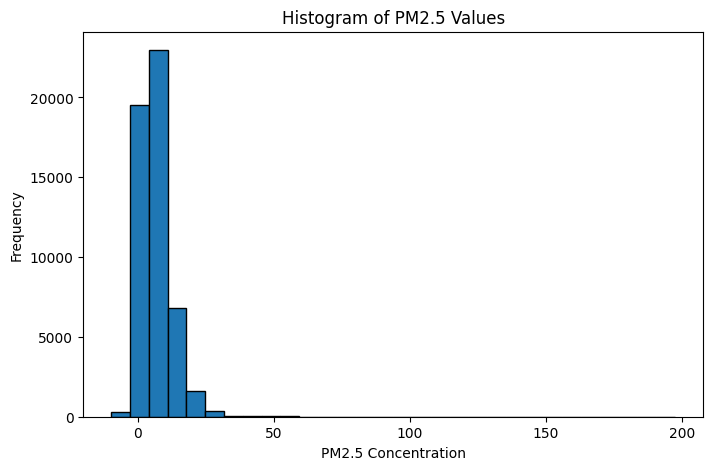

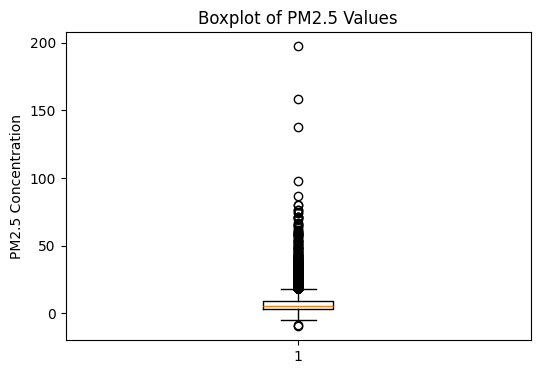

No 'temperature' column in this dataset — skipping scatter plot as instructed.


In [7]:
# Load ALL rows
airquality = pd.read_csv("airquality.csv")

# Cleaned
airquality_clean = airquality.dropna(axis=0, how="any").copy()
airquality_clean["value"] = pd.to_numeric(airquality_clean["value"], errors="coerce")
airquality_clean = airquality_clean.dropna(subset=["value"]).copy()

# Filter PM2.5
pm25_df = airquality_clean[airquality_clean["pollutant"].str.lower() == "pm25"]
print("PM2.5 rows:", len(pm25_df))

# Histogram (PM2.5)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(pm25_df["value"], bins=30, edgecolor="black")
plt.title("Histogram of PM2.5 Values")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.show()

# Boxplot (PM2.5)
plt.figure(figsize=(6,4))
plt.boxplot(pm25_df["value"], vert=True)
plt.title("Boxplot of PM2.5 Values")
plt.ylabel("PM2.5 Concentration")
plt.show()

# 3) Scatter PM2.5 vs Temperature
temp_col = next((c for c in ["temperature", "temp", "air_temperature"] if c in airquality_clean.columns), None)
if temp_col is not None:
    plt.figure(figsize=(8,5))
    plt.scatter(pm25_df["value"], airquality_clean.loc[pm25_df.index, temp_col])
    plt.title("Scatter: PM2.5 vs Temperature")
    plt.xlabel("PM2.5 Concentration")
    plt.ylabel(temp_col)
    plt.show()
else:
    print("No 'temperature' column in this dataset — skipping scatter plot as instructed.")



## Submitting Your Work

Save you work to the path week07/week07_assignment_pandas.ipynb